In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19eda/fifa_eda.csv


In [2]:
df = pd.read_csv('/kaggle/input/fifa19eda/fifa_eda.csv')
df.head(4)
df.shape

(18207, 18)

In [3]:
import seaborn as sns 

In [4]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

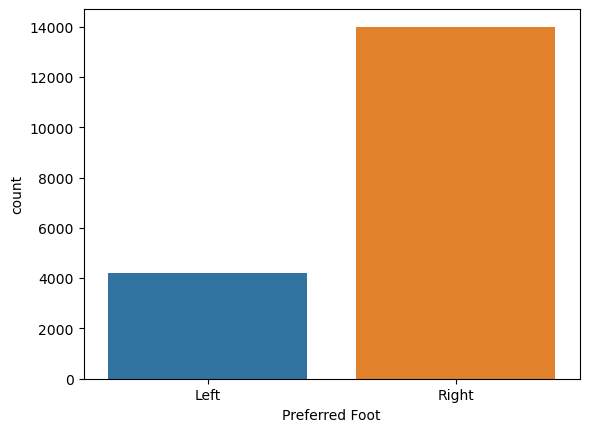

In [5]:
import matplotlib.pyplot as plt 
sns.countplot( x = df['Preferred Foot'] )


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Age', ylabel='Density'>

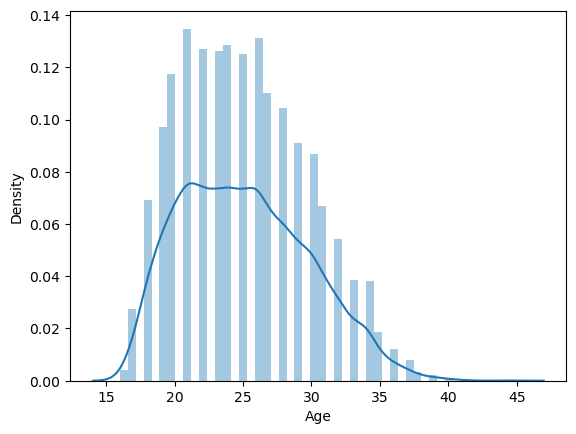

In [6]:
import matplotlib.pyplot as plt 
sns.distplot(df['Age'])

<AxesSubplot:>

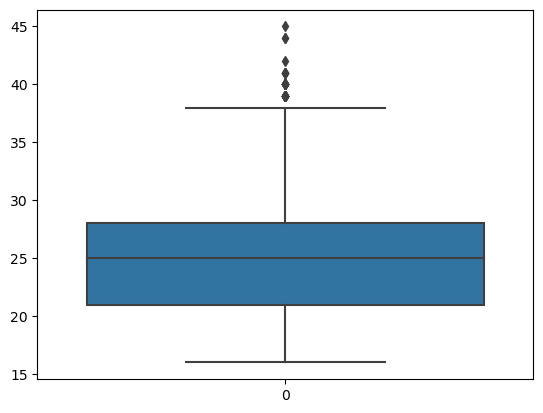

In [7]:
sns.boxplot(df['Age'])   

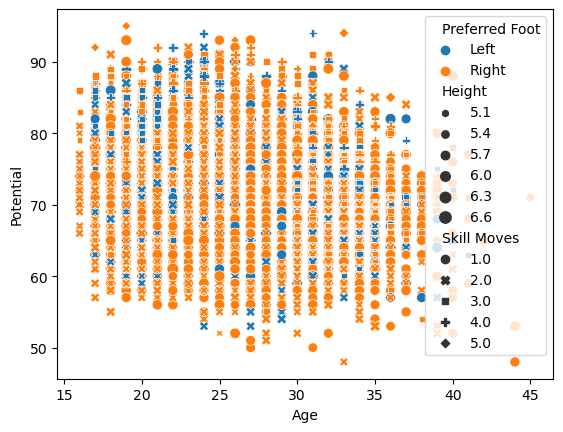

16

In [8]:
# multivariate EDA  : 

# 1.(numerical numerical data :) 

sns.scatterplot(x= df['Age'], y = df['Potential']  , hue = df['Preferred Foot'] , style = df['Skill Moves'] , size = df['Height'])
plt.show ()
df['Age'].min()

<AxesSubplot:xlabel='Preferred Foot', ylabel='Age'>

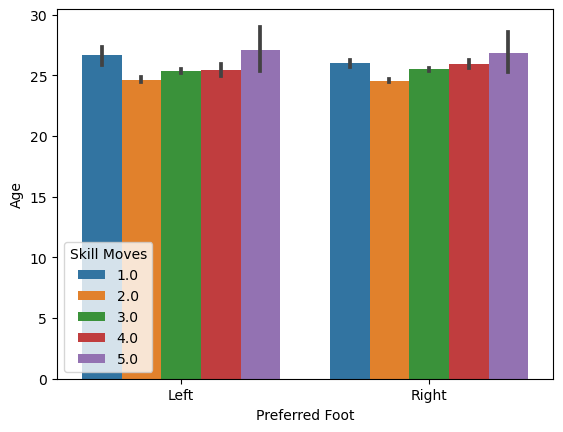

In [9]:
## 2.1 (numeric, categorica data : ) 
sns.barplot (x = df['Preferred Foot'] , y = df['Age'] , hue = df['Skill Moves']) 

<AxesSubplot:xlabel='Preferred Foot', ylabel='Skill Moves'>

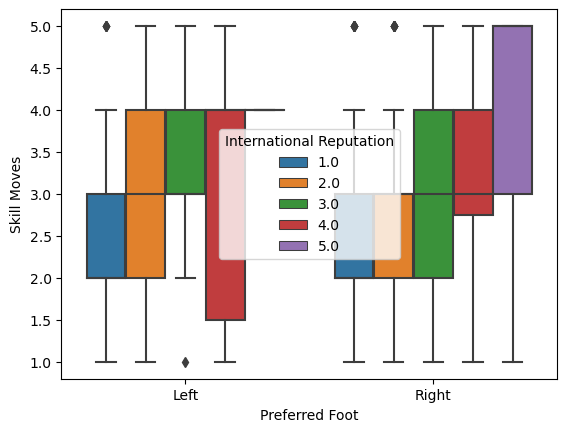

In [10]:
#2.2 ( using boxplot ) 

sns.boxplot( x = df['Preferred Foot'] , y = df['Skill Moves'] , hue = df['International Reputation'] ) 


<AxesSubplot:xlabel='Age', ylabel='Density'>

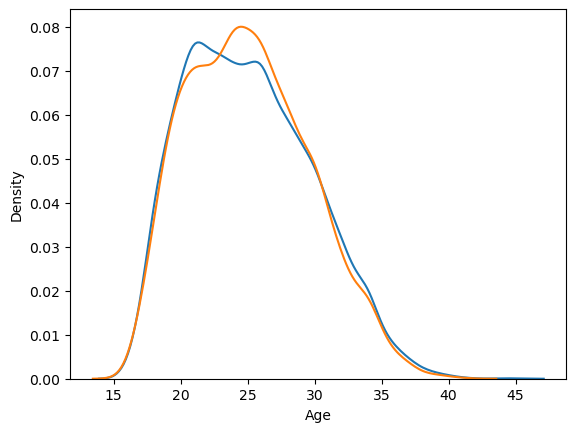

In [11]:
# 3. dist plot ( numeric  - categorical ) 
df.head()
import warnings 
warnings.filterwarnings('ignore')
df['Age'].mean() 

sns.distplot( df[df['Preferred Foot'] ==  'Right' ]['Age'], hist = False) #pdf of that person  who is righty  
sns.distplot( df[df['Preferred Foot'] ==  'Left' ]['Age'] , hist = False) #pdf of that person  who is lefty

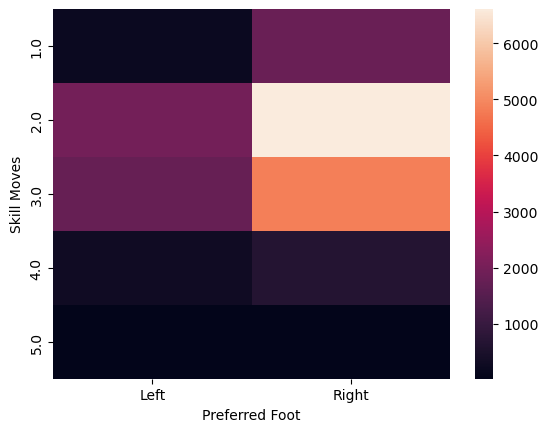

<AxesSubplot:xlabel='Preferred Foot'>

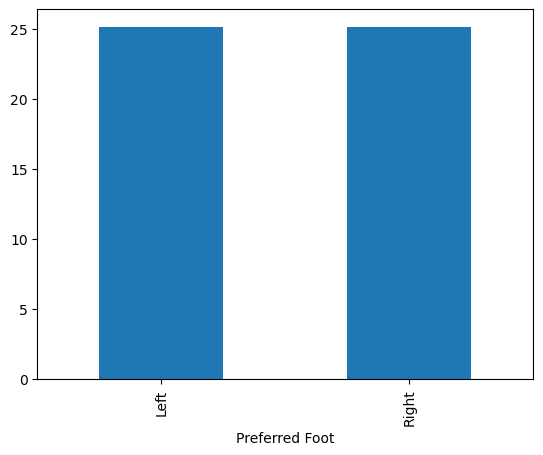

In [12]:
## categirica - categorical data : 
skill_X_preferredfoot  = pd.crosstab( df['Skill Moves'], df['Preferred Foot'])
sns.heatmap(skill_X_preferredfoot)
plt.show()

new = df.groupby(df['Preferred Foot']).mean()['Age'] # person with lefty or righty with avrage age 
new.plot(kind = 'bar') 

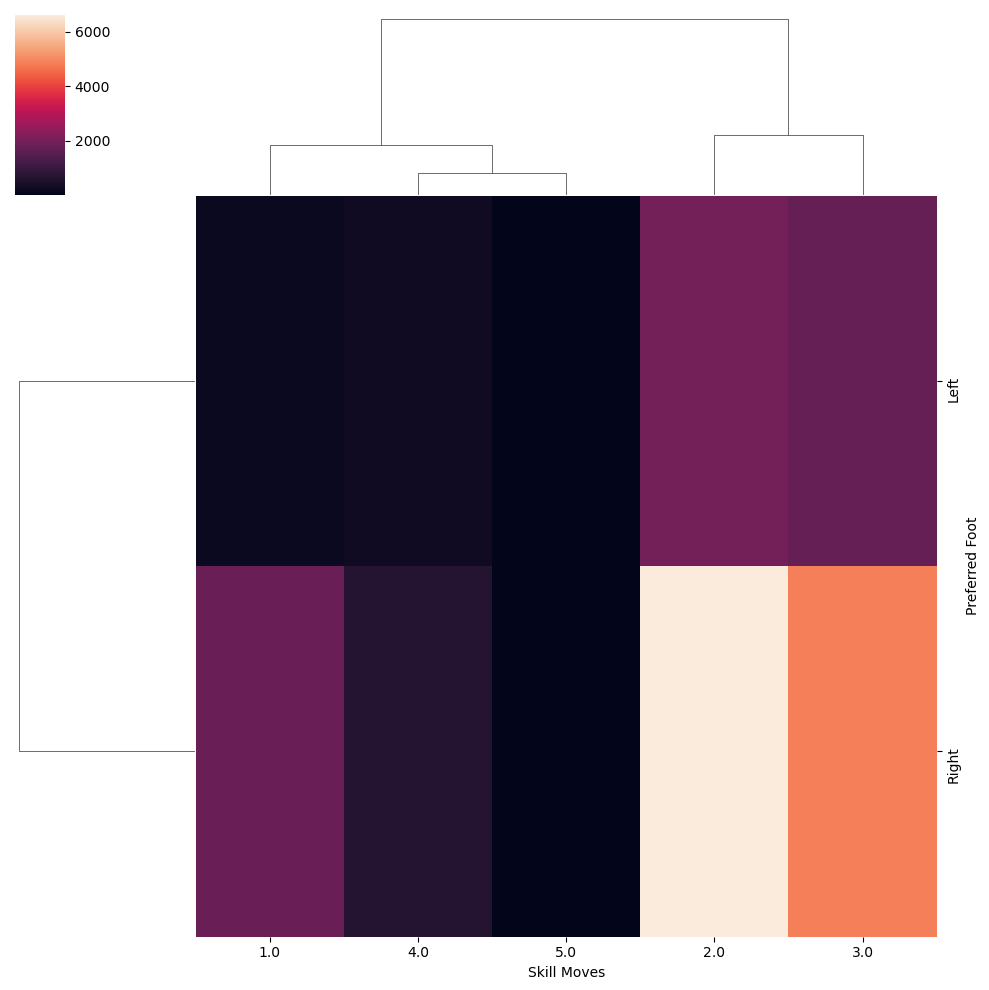

In [13]:
#3.2 categorical - cateforical data : (cluster map : )

cluster = pd.crosstab(df['Preferred Foot'] ,df['Skill Moves'] )
sns.clustermap(cluster)

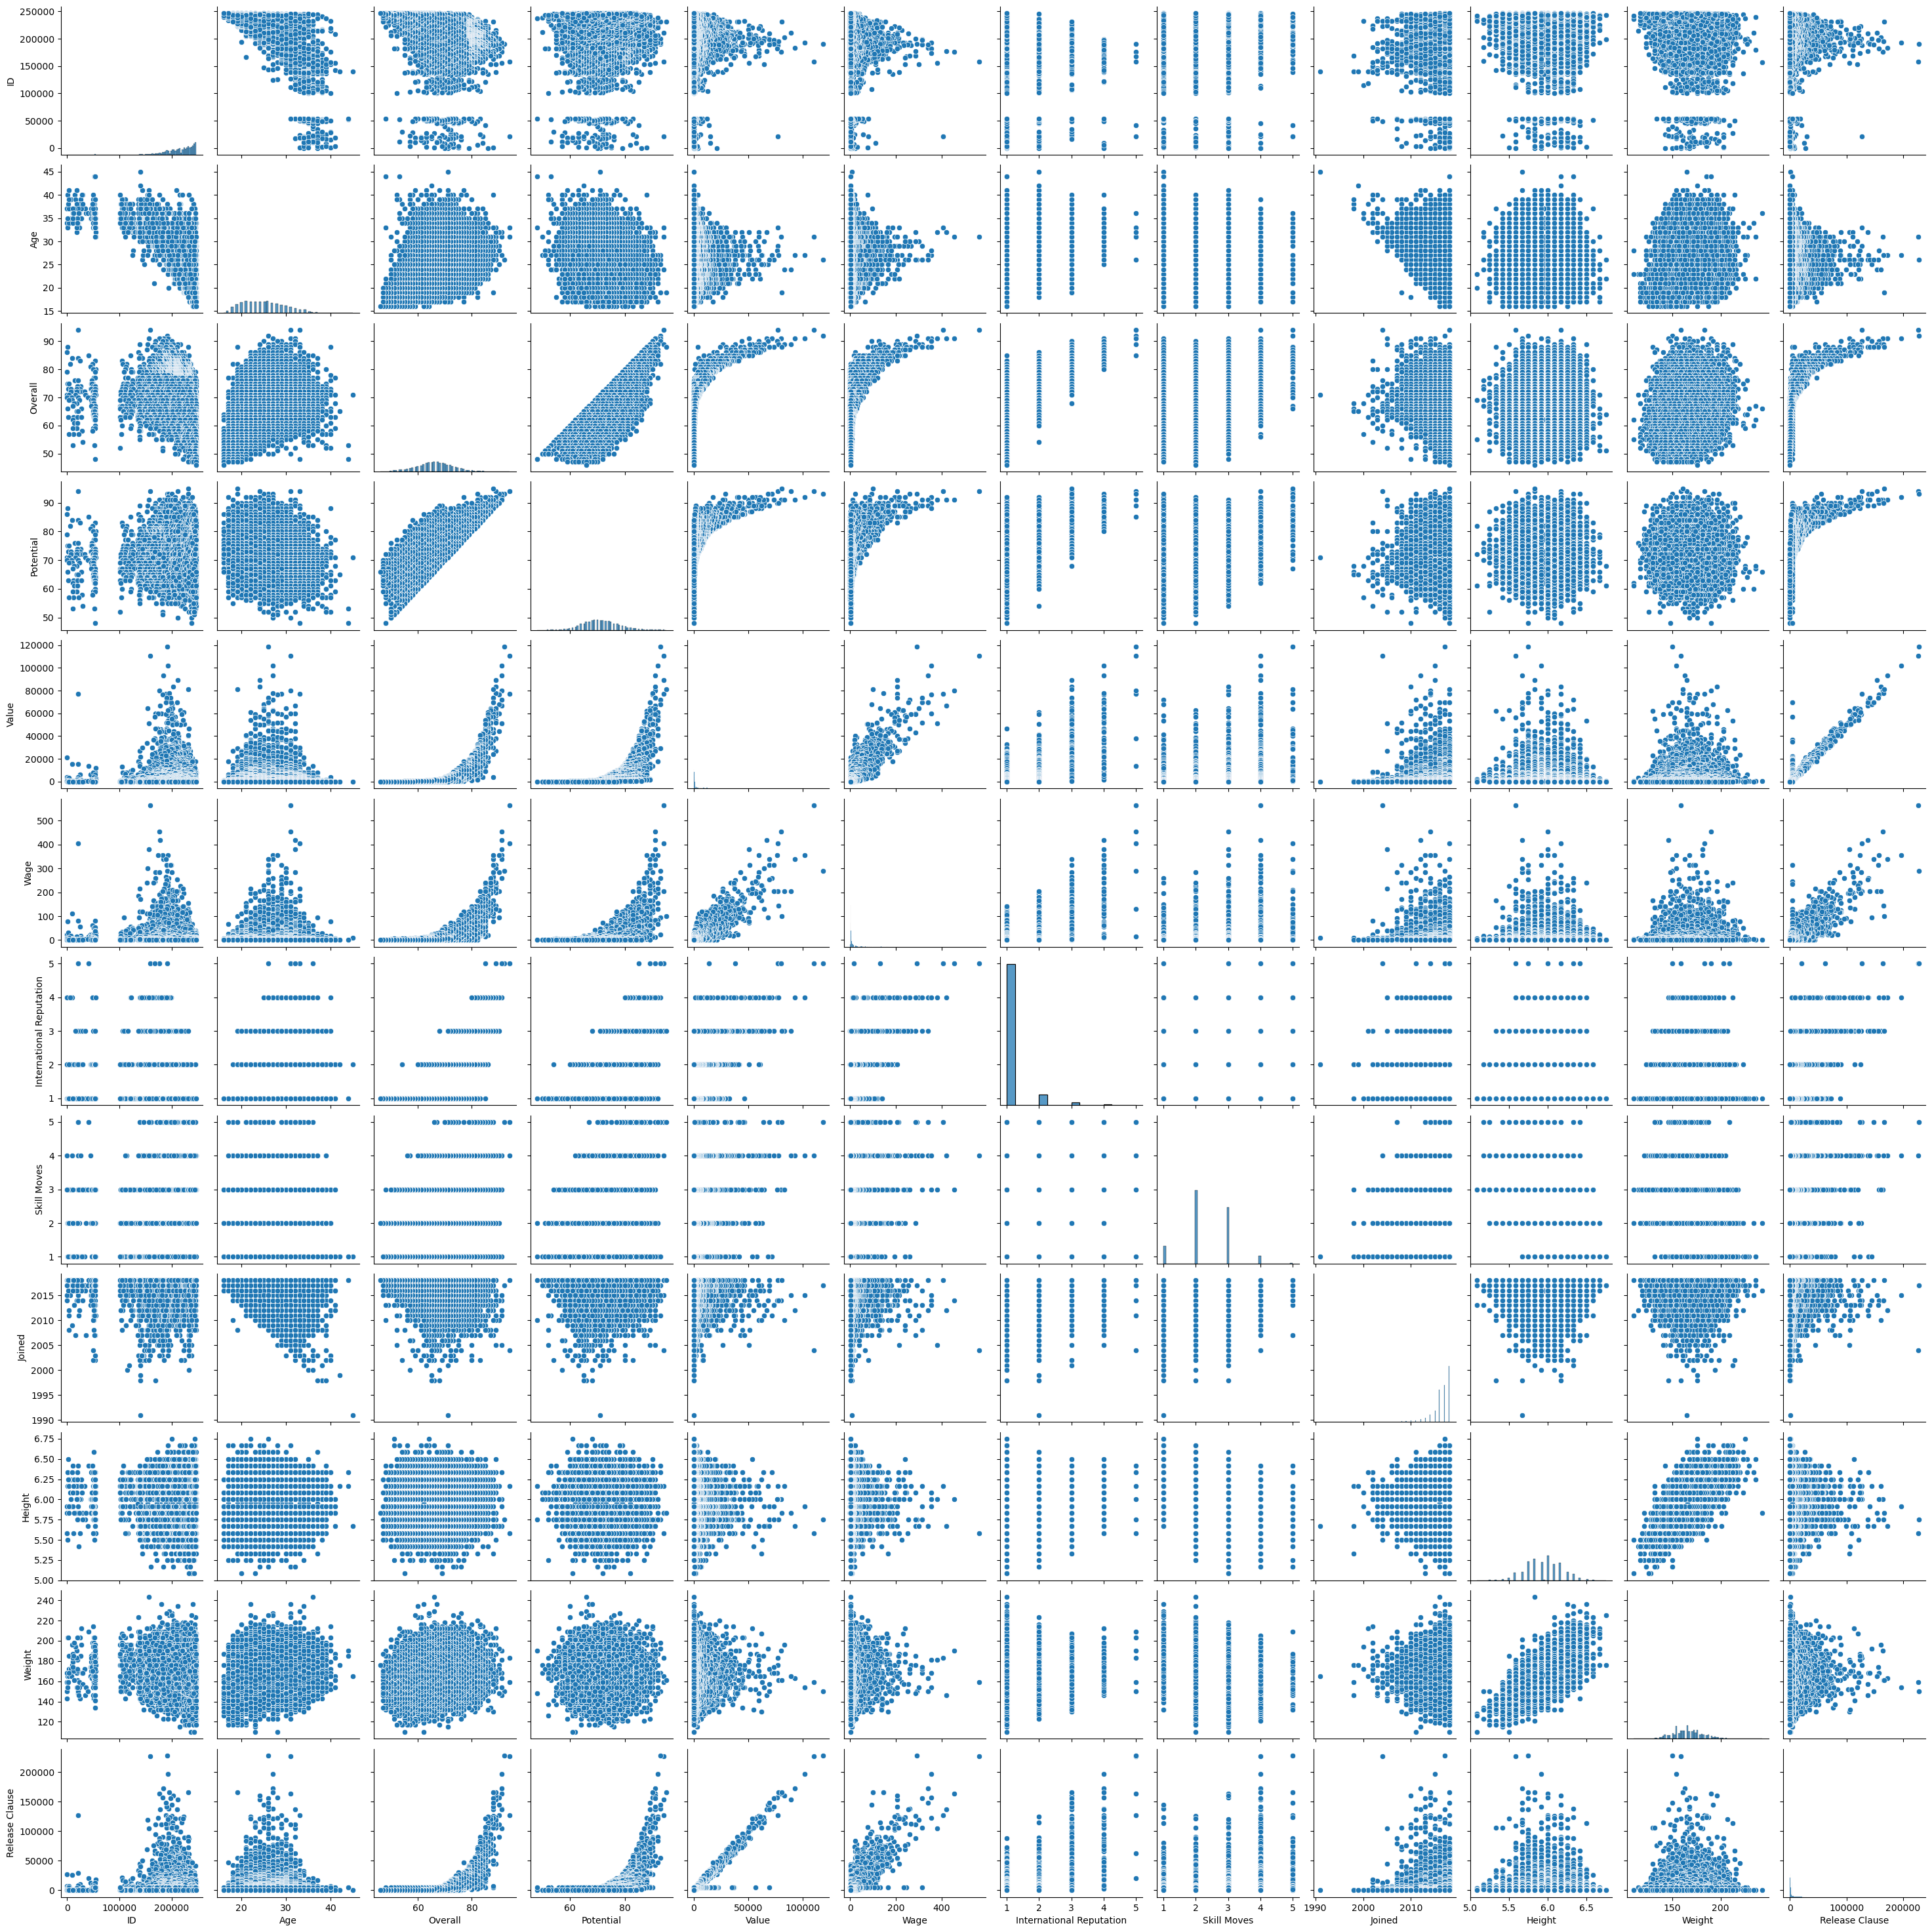

In [14]:
sns.pairplot(df)

In [15]:
# numeric numeric ( spacial case of scatter plot ) ## time based fluctuation 
grup = df.groupby('Skill Moves').sum()['Age']

